Part 1: Prepare the Data
1. Read myopia.csv into a Pandas DataFrame.
    - Note: This file can be found in your Module 20 Challenge files.
2. Remove the "MYOPIC" column from the dataset.
    - Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!
3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.


In [64]:
import pandas as pd
from pathlib import Path

In [65]:
file_path = Path("myopia.csv")
myopia_data = pd.read_csv(file_path)
myopia_data.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [66]:
# Remove the myopic Column
myopia_df = myopia_data.drop(columns=["MYOPIC"],axis=1)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [67]:
len(myopia_df.dtypes)
myopia_df.describe

<bound method NDFrame.describe of      AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0      6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1      6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2      6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3      6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4      5  0.697  23.290001  3.676  3.454  16.16       14       0       0   
..   ...    ...        ...    ...    ...    ...      ...     ...     ...   
613    6  0.678  22.400000  3.663  3.803  14.93        2       0       7   
614    6  0.665  22.500000  3.570  3.378  15.56        6       0       1   
615    6  1.834  22.940001  3.624  3.424  15.89        8       0       0   
616    6  0.665  21.920000  3.688  3.598  14.64       12       2       1   
617    6  0.802  22.260000  3.530  3.484  15.25       25       0       2   

     STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0      

In [68]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df)

Part 2: Apply Dimensionality Reduction
1. Perform dimensionality reduction with PCA. How did the number of the features change?
    - THe features changed from 14 to 10 when applying dimensionality reduction from original.
2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [69]:
# Perform dimensionality reduction with PCA at n_components=0.90
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [70]:
# Fetch the explained variance
pca.explained_variance_ratio_

# there are 10 features when PCA is performed
# len(pca.explained_variance_ratio_)

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [71]:
# Transform PCA data to a DataFrame
myopia_pca = pd.DataFrame(
    data=pca_transformed_data, columns=["principal component 1", "principal component 2","principal component 3", "principal component 4","principal component 5", "principal component 6","principal component 7", "principal component 8", "principal component 9", "principal component 10"]
)
myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [72]:
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\alexc\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [73]:
transformed_features.shape

(618, 2)

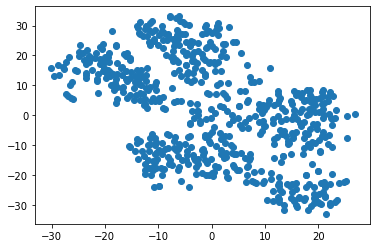

In [74]:
# Plot the results
import matplotlib.pyplot as plt
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()


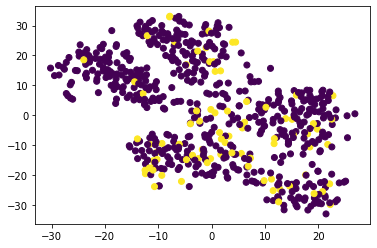

In [75]:
# Results colored by target value
plt.scatter(transformed_features[:,0], transformed_features[:,1], c=myopia_data["MYOPIC"])
plt.show()

Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

- Use a for loop to determine the inertia for each k between 1 through 10.

- If possible, determine where the elbow of the plot is, and at which value of k it appears.

C:\Users\alexc\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


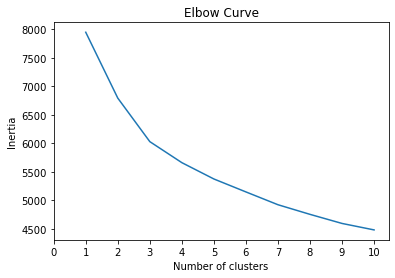

In [76]:
from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [77]:
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [82]:
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
myopia_pca = pd.DataFrame(pca_transformed_data, columns=columns)
myopia_pca['class']= km.labels_
myopia_pca.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


C:\Users\alexc\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\alexc\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


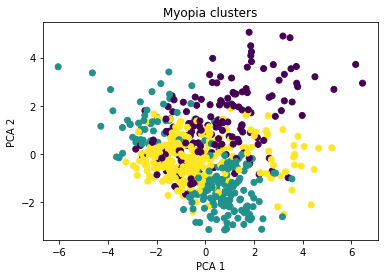

In [83]:
# Use the K-Means model with 3 n_clusters based on elbow graph
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(myopia_pca)

# Predict clusters
predictions = model.predict(myopia_pca)

# Add predicted clusters (labels) to DataFrame
myopia_data['MYOPIC'] = model.labels_
# Plot the Clusters
plt.scatter(x=myopia_pca[1], y=myopia_pca[2], c=myopia_data['MYOPIC'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

- The recommended amount of clusters based on the elbow curve is likely 3 clusters, however after adjusting the data with PCA, t-sne and using the cluster analysis with K-means the scatter shows an indeterminate grouping for identfying myopia in patients. My recommendation would be to expand the dataset so that there is more to work with and also testing using other clustering algorithms.